In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import classification_report

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(train_image,train_labels),(test_image, test_labels)=mnist.load_data()

In [10]:
train_image.shape

(60000, 28, 28)

In [11]:
test_image.shape

(10000, 28, 28)

In [13]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

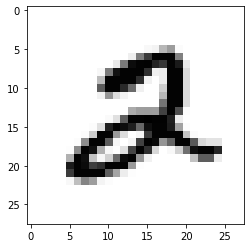

In [21]:
plt.imshow(train_image[5],cmap="Greys")

In [23]:
#normalization 
train_images= train_image.astype("float32")/255
test_images=test_image.astype("float32")/255

In [30]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy")
model.fit(train_images,train_labels,epochs=3,batch_size=64)

Epoch 1/3
938/938 [==============================] - 1s 972us/step - loss: 0.4147
Epoch 2/3
938/938 [==============================] - 1s 1ms/step - loss: 0.2170
Epoch 3/3
938/938 [==============================] - 1s 879us/step - loss: 0.1728


In [32]:
predicted_labels=model.predict(test_images)
predicted_labels=np.argmax(predicted_labels,axis=1)

In [33]:
print(classification_report(test_labels,predicted_labels))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.97      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.91      0.96      0.93      1010
           4       0.95      0.96      0.95       982
           5       0.97      0.90      0.93       892
           6       0.96      0.95      0.96       958
           7       0.97      0.95      0.96      1028
           8       0.92      0.94      0.93       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



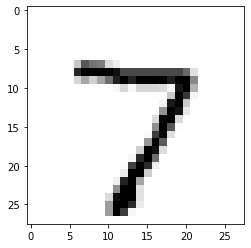

In [36]:
plt.imshow(test_image[0],cmap="Greys")

In [40]:
predicted_labels=model.predict(np.array([test_image[0]]))
predicted_labels=np.argmax(predicted_labels,axis=1)
print(predicted_labels)

[7]
